## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_mouse_data_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#sorted the combined data frame by the Mouse ID column
combined_mouse_data_df.sort_values("Mouse ID", inplace = True)

#found the mouse in the Mouse ID coulmn that had duplicate Timepoint enteries
duplicate_mice = combined_mouse_data_df[combined_mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
908,g989,Propriva,Female,21,26,0,45.000000,0
916,g989,Propriva,Female,21,26,20,55.326122,1
915,g989,Propriva,Female,21,26,15,53.442020,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Created a new dataframe with the Mouse ID column set as the index
mouse_data_idex_df = combined_mouse_data_df.set_index('Mouse ID')

#Dropped mouse g989 due to duplicated data in the original dataframe
dropped_mouse_data_df = mouse_data_idex_df.drop(index='g989')

#Reset the index of the cleaned data
clean_mouse_data = dropped_mouse_data_df.reset_index()
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,30,59.523197,1
1,a203,Infubinol,Female,20,23,35,61.931650,2
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,20,55.173336,1
4,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,20,57.898778,2
1876,z969,Naftisol,Male,9,30,25,63.145652,2
1877,z969,Naftisol,Male,9,30,30,65.841013,3
1878,z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

#Grouped the cleaned dataframe by the Drug Regimen used to treat the tumors
drug_groups = clean_mouse_data.groupby(['Drug Regimen'])

#Calculated the mean, median, variance, standard deviation, and SEM of the tumor volume and assigned them to a variable.
drug_mean = drug_groups["Tumor Volume (mm3)"].mean()
drug_median = drug_groups["Tumor Volume (mm3)"].median()
drug_var = drug_groups["Tumor Volume (mm3)"].var()
drug_std = drug_groups["Tumor Volume (mm3)"].std()
drug_sems = drug_groups["Tumor Volume (mm3)"].sem()
drug_sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Assemble the resulting series into a single summary dataframe.

In [9]:
#Created a summary data frame to show the calculations for mean, median, variance, standard deviation, and SEM of the tumor volume
drug_groups_df = pd.DataFrame({"mean" : drug_mean, "median" : drug_median, "var" : drug_var, "std" : drug_std, "sem" : drug_sems})
drug_groups_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Used the aggregation method to recreate the above dataframe showing the calculations for mean, median, variance, standard deviation, and SEM of the tumor volume
clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Found the total number of measurements taken for each drug regimen by using group made in previous task an applying 
#and using the count function to count the total number of measurments taken for each drug.
drug_count = drug_groups["Tumor Volume (mm3)"].count()
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

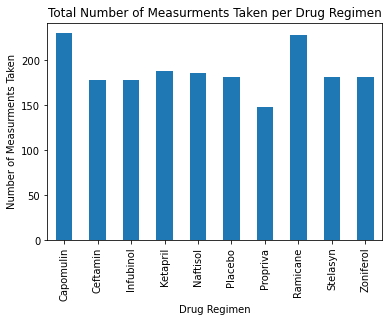

In [12]:
#created bar graph using pandas .plot method.
drug_count.plot(kind="bar")

#added a title and labels to the graph
plt.title("Total Number of Measurments Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurments Taken")

plt.show()

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#generated x-axis by running .unique function on the Drug Regimen column for the clean dataframe
x_axis = clean_mouse_data["Drug Regimen"].unique()

x_axis


array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

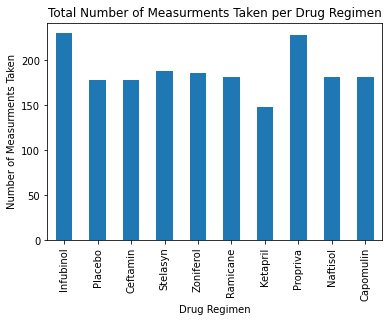

In [14]:
#Created bar graph using pyplot method. Adjusted the bar width to match the previous graph
plt.bar(x_axis, drug_count, width = 0.5)

#Adjusted the ticks to be vertially oriented and adjusted the xlimit to closly match previous graph
plt.xticks(rotation='vertical')
plt.xlim(-.5, len(x_axis)-.5)

#Added title and labels
plt.title("Total Number of Measurments Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurments Taken")


plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Grouped the df by gender and counted how many mice of each gender
gender_group = clean_mouse_data.groupby(['Sex'])
gender_count = gender_group.count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


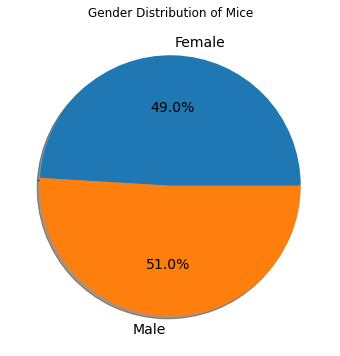

In [16]:
#Created pie graph with pandas. Added title and percentages. Also removed the leged and changed the size of the graph and font size.
gender_count.plot(kind="pie", y='Mouse ID', title=("Gender Distribution of Mice"), autopct='%1.1f%%', 
                  figsize=(12,6), legend=False, fontsize=14, shadow=True)
#Removed the y-label
plt.ylabel("")

plt.show()

([<matplotlib.patches.Wedge at 0x1e486f5d550>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

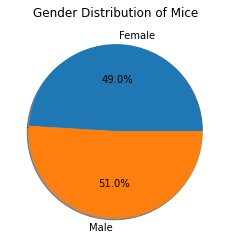

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Created counts on gender from data grouped by gender
gender_numbers = gender_group['Mouse ID'].count()

#Included labels and title
labels = ["Female", "Male"]
plt.title("Gender Distribution of Mice")

#Generated pie plot of female vs male with percentages showing.
plt.pie(gender_numbers, labels=labels, autopct='%1.1f%%', shadow=True)

## Quartiles, Outliers and Boxplots

In [18]:
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,30,59.523197,1
1,a203,Infubinol,Female,20,23,35,61.931650,2
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,20,55.173336,1
4,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,20,57.898778,2
1876,z969,Naftisol,Male,9,30,25,63.145652,2
1877,z969,Naftisol,Male,9,30,30,65.841013,3
1878,z969,Naftisol,Male,9,30,35,69.176246,4


In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse_data.groupby('Mouse ID').max()['Timepoint']
last_timepoint_df = last_timepoint_df.reset_index()
#last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_clean_mouse_data = pd.merge(last_timepoint_df, clean_mouse_data, on=('Mouse ID', 'Timepoint'), how='left')
merged_clean_mouse_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [55]:
results_dict = {"Capomulin" : None, "Ramicane" : None, "Infubinol" : None, "Ceftamin" : None}

for drug in results_dict:
    #print(drug)
    
    tumor_volums = merged_clean_mouse_data.loc[merged_clean_mouse_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    #print(type(tumor_volums), tumor_volums)
    quartiles = tumor_volums.quantile([.25,.5,.75])
    #print(type(quartiles), quartiles)
    lowerq = quartiles[0.25]
    #print(type(lowerq), lowerq)
    upperq = quartiles[0.75]
    #print(type(upperq), upperq)
    iqr = upperq-lowerq
    #print(type(iqr), iqr)
    mean = quartiles[0.5]
    #print(type(mean), mean)
    lower_bound = lowerq - (1.5*iqr)
    #print(type(lower_bound), lower_bound)
    upper_bound = upperq + (1.5*iqr)
    #print(type(upper_bound), upper_bound)
    #Tumor volume is the only variable needed for box plot
    results_dict[drug] = tumor_volums
#print(results_dict)

    print(f"The lower quartile of Tumor Volume for {drug} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume for {drug} is: {upperq}")
    print(f"The interquartile range of Tumor Volume for {drug} is: {iqr}")
    print(f"The the median of Tumor Volume for {drug} is: {mean}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The the median of Tumor Volume for Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The the median of Tumor Volume for Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Tumor Volume for Infubinol is: 11.477135160000003
The the median of Tumor Volume for Infubinol is: 60.16518046
Values 

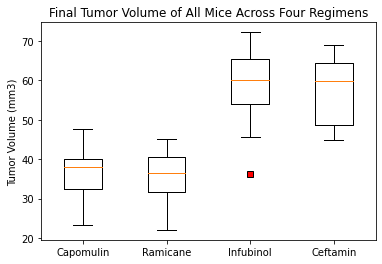

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume_list = [v for k, v in results_dict.items()]
#print(final_tumor_volume_list)
red_square = dict(markerfacecolor='r', marker='s')
#ax1 = plt.figure().subplots()
plt.boxplot(final_tumor_volume_list, labels=results_dict.keys(), flierprops=red_square)
plt.title("Final Tumor Volume of All Mice Across Four Regimens")
plt.ylabel("Tumor Volume (mm3)")


plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#created dataframe for to only include Capomulin regimen to select a mouse
capo_reg = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
capo_reg.head()

In [ ]:
#Pulled data for mouse b128 and sorted the Timepoint values
mouse_b128 = capo_reg.loc[capo_reg["Mouse ID"] == "b128"].sort_values("Timepoint")

#found time points
timepoint = mouse_b128["Timepoint"]

#created data for x-axis with numpy arange. Used max function on timepoint to find the highest time point number
x_axis_data = np.arange(0,(timepoint.max())+5,5)

#pulled data for tumor volumn
tumor_volume = mouse_b128["Tumor Volume (mm3)"]

#created line chart with markers for each data point and colered the line green
plt.plot(x_axis_data,tumor_volume, marker="o", color='green')

#added a title and axis labels to the chart
plt.title("Tumor Volume vs. Time Point for Mouse b128")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#created data frame to only have Mouse ID, Tumor Volume, and Weight
capo_data = capo_reg.loc[:,["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]

#Over rode data frame and grouped by the data by Mouse ID and weight. Calculated the average of Tumor Volume and reset the index 
capo_data = capo_data.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
capo_data

#Found weights
weight = capo_data["Weight (g)"]
#Pulled average tumor volume from new data frame
avg_tum_vol = capo_data["Tumor Volume (mm3)"]
#Created x-axis using Numpy arange. Used max function to find the maximum axis value
x_axis = weight

#Generated scatter plot and included markers for the data point
plt.scatter(x_axis,avg_tum_vol, marker="o", s=x_axis, alpha=0.75)
#Added title and axis labels
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Computed the Pearson Correlation Coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation =  st.pearsonr(weight,avg_tum_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

In [ ]:
#imported dependancy
from scipy.stats import linregress

#Copied scatter plot above and added the linear regression equation and plot to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tum_vol)
regress_values = weight * slope + intercept
plt.scatter(x_axis,avg_tum_vol, marker="o", s=x_axis, alpha=0.75)
plt.plot(weight,regress_values,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()